# Bird Species Prediction

I this project, we aim to develop a Convolutional Neural Network (CNN) using Keras to accurately classify various bird species based on their images. The process involves several key steps:

 ___1. Data Collection and Preprocessing___:

Gather a comprehensive dataset of bird images, ensuring a diverse representation of species. Preprocess these images by resizing, normalizing pixel values, and augmenting the data to enhance model robustness.

___2. Model Architecture Design:___

 Construct a _CNN_ architecture tailored for image classification tasks. This includes defining multiple layers such as convolutional layers for feature extraction, pooling layers for dimensionality reduction, and fully connected layers for classification.

___3. Compilation and Training:___

Compile the model by specifying the loss function, optimizer, and evaluation metrics. Train the model using the prepared dataset, adjusting hyperparameters like learning rate, batch size, and the number of epochs to optimize performance.

___4. Evaluation and Testing:___

 Assess the model's performance on a separate test dataset to evaluate its accuracy and generalization capability. Utilize metrics such as accuracy, precision, recall, and confusion matrices to gain insights into the model's effectiveness.

___5. Model Optimization:___

 Fine-tune the model by experimenting with different hyperparameters, architectures, and regularization techniques to improve accuracy and prevent overfitting.

___6. Deployment:___

Once satisfied with the model's performance, deploy it to classify new bird images, facilitating applications in bird species identification and conservation efforts.

Building a Convolutional Neural Network (CNN) to classify bird species is a practical application of deep learning in computer vision. Utilizing platforms like Google Colab and frameworks such as TensorFlow and Keras can streamline this process.

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


### Setting Up the Environment


First we will mount our google drive on colab so that we can use the dataset directly from our drive. For this you first need to upload the data on your drive and then mount the drive on colab.

* Google Colab: An online platform that provides free access to GPUs, facilitating the development and training of deep learning models.

* TensorFlow and Keras: Popular deep learning libraries in Python that offer user-friendly APIs for building and training neural networks.

In [3]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "//content/drive/My Drive/Bird Species detection using CNN/Data/Bird Speciees Dataset"

'AMERICAN GOLDFINCH'  'CARMINE BEE-EATER'  'EMPEROR PENGUIN'
'BARN OWL'	      'DOWNY WOODPECKER'    FLAMINGO


After mounting your Google Drive in Colab, you can navigate to the specific folder containing your dataset to access and work with your files directly. For instance, if your dataset is stored in a folder named 'Bird Species Dataset' within your Drive, you can list all files in that directory using the above code:

To begin, we'll import the necessary libraries, adhering to Python's best practices for clarity and maintainability.

In [4]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

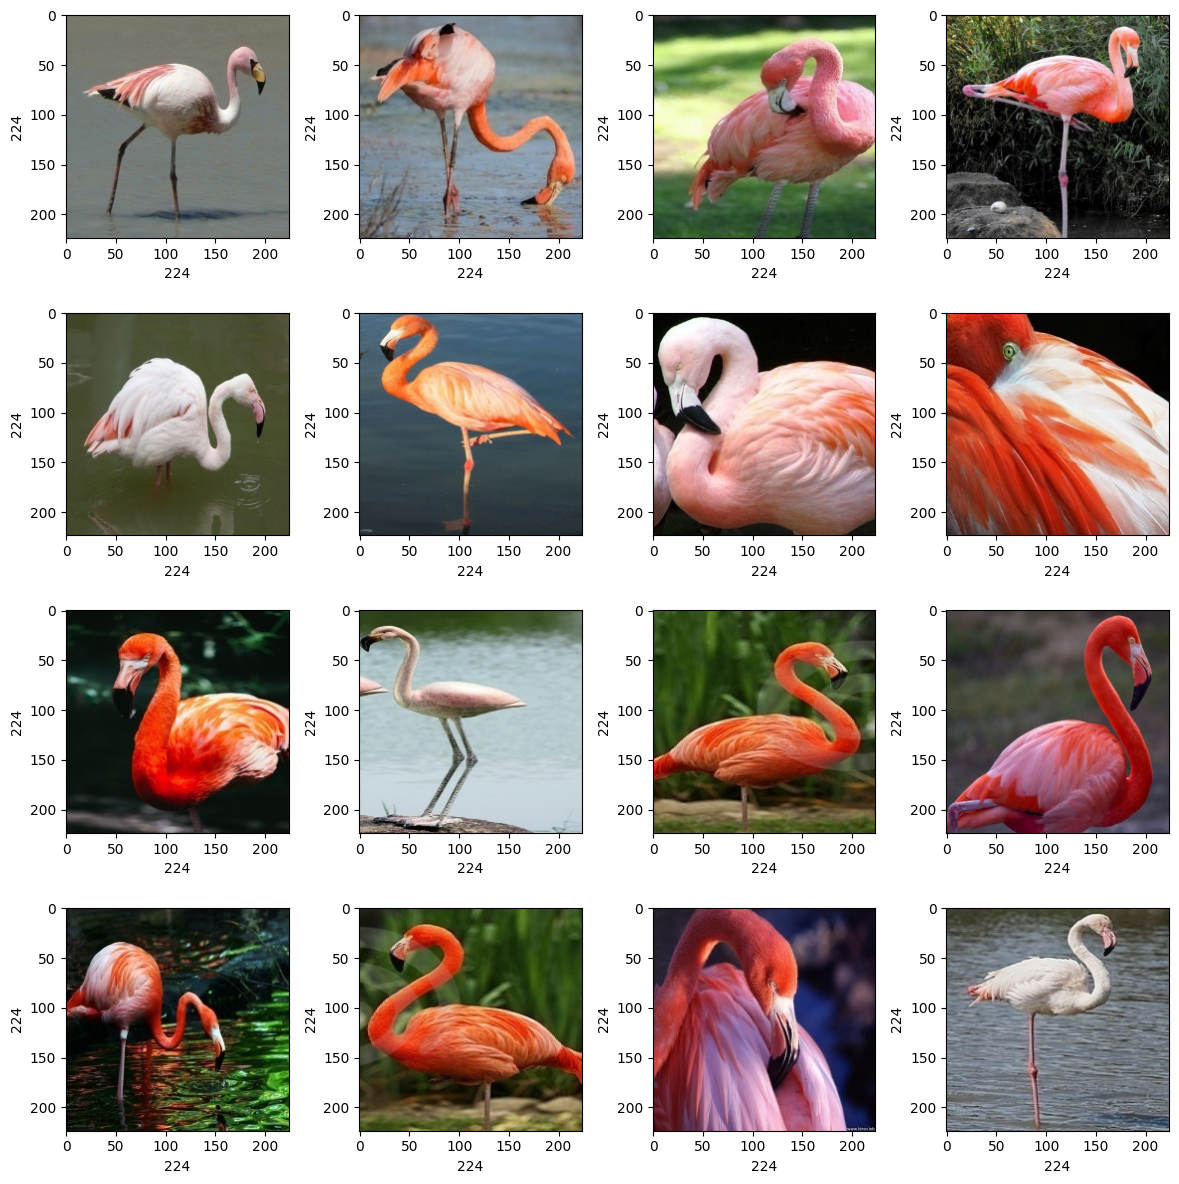

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Bird Species detection using CNN/Data/Bird Speciees Dataset/FLAMINGO"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)


__Figure Setup:__

plt.figure(figsize=(12,12)) initializes a new figure with a size of 12x12 inches.
Image Directory Path: The variable path is set to the directory containing the images you want to display.

__Loop Through Subplots:__

A for loop iterates from 1 to 16 to create a 4x4 grid of subplots:
* plt.subplot(4,4,i) specifies the position of the current subplot in a 4x4 grid.
* plt.tight_layout() adjusts subplot parameters for a neat layout.
* rand_img = imread(path +'/'+ random.choice(sorted(listdir(path)))) selects a random image from the directory, reads it, and stores it in rand_img.
* plt.imshow(rand_img) displays the selected image in the current subplot.
* plt.xlabel(rand_img.shape[1], fontsize = 10) sets the x-axis label to the image's width.
* plt.ylabel(rand_img.shape[0], fontsize = 10) sets the y-axis label to the image's height.


To begin processing our dataset, we'll define the root directory containing the bird species images and retrieve the names of all subdirectories, each representing a distinct bird species. Additionally, we'll initialize two empty lists: one to store the image data and another for the corresponding labels.

In [7]:
# Setting path and creating empty list
dir = "/content/drive/My Drive/Bird Species detection using CNN/Data/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

To process our dataset, we'll iterate through each bird species folder, read the images, convert them into arrays, and append these arrays along with their corresponding labels to the previously initialized lists. Here's how to implement this:

In [8]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Check for class imbalance.

In [9]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
AMERICAN GOLDFINCH,143
EMPEROR PENGUIN,139
DOWNY WOODPECKER,137
FLAMINGO,132
CARMINE BEE-EATER,131
BARN OWL,129


Next we will find out the number of classes that we will be working on.

In [10]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

Checking the size of the single image.

In [11]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

Checking the shape of image labels which will be equal to the number of images we are going to work with.

In [12]:
# Checking labels shape
label_list = np.array(label_list)
label_list.shape

(811,)

Now we will split the data into training and testing using train_test_split() of sklearn.

In [13]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

Next we will normalize the images by dividing them with 255. Also, we will reshape x_train and x_test.

In [14]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

Next we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [15]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


Now we will split the training data to validation and training data.

In [16]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

To construct our Convolutional Neural Network (CNN) for bird species classification, we'll utilize several key layers in Keras, each serving a distinct function:

___1. Convolutional Layers (Conv2D):___

These layers apply convolution operations to the input data, enabling the network to learn spatial hierarchies of features. By convolving filters (kernels) with the input, they capture local patterns such as edges and textures.

___2. Pooling Layers (MaxPooling2D):___

These layers perform downsampling by selecting the maximum value within a defined window (pool size), effectively reducing the spatial dimensions of the data. This process helps in diminishing computational complexity and controlling overfitting by abstracting feature representations.

___3. Flatten Layer (Flatten):___

This layer transforms the multidimensional output of the convolutional and pooling layers into a one-dimensional vector, preparing the data for the fully connected layers.

___4. Fully Connected Layers (Dense):___

These layers operate as classifiers, where each neuron is connected to all neurons in the preceding layer. They process the flattened input to produce the final output.


In the final layer, we employ the Softmax Activation Function. This function converts the output logits into probabilities, facilitating the model's ability to handle multiclass classification by assigning probability scores to each class.

In [17]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 74, 74, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         331,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

When compiling our Convolutional Neural Network (CNN) for bird species classification, it's essential to specify the appropriate loss function, optimizer, and evaluation metrics to guide the training process effectively.

Loss Function:

For this multiclass classification problem, we use Categorical Crossentropy as the loss function. This function measures the discrepancy between the true class labels and the predicted probabilities, guiding the model to minimize this difference during training.

Optimizer:

The Adam optimizer is selected for its efficiency and adaptive learning rate capabilities, which help in achieving faster convergence and improved performance.

Evaluation Metrics:

To assess the model's performance, we employ Categorical Accuracy as the evaluation metric. This metric calculates the frequency with which the predicted class matches the true class label, providing a clear measure of the model's classification accuracy.

In [18]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

To evaluate our Convolutional Neural Network's performance during training, we'll train the model for 50 epochs with a batch size of 128. This setup allows us to monitor the model's learning progress by observing the training and validation accuracy at each epoch. If the model achieves high accuracy early, extending the number of epochs may not yield significant improvements. Conversely, if the model hasn't converged, increasing the epochs could enhance performance.

In [19]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1575 - loss: 1.8946 - val_accuracy: 0.1769 - val_loss: 1.8575
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2583 - loss: 1.7911 - val_accuracy: 0.2846 - val_loss: 1.7550
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2700 - loss: 1.7399 - val_accuracy: 0.4000 - val_loss: 1.7392
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3517 - loss: 1.7205 - val_accuracy: 0.3000 - val_loss: 1.7326
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4282 - loss: 1.6652 - val_accuracy: 0.3462 - val_loss: 1.6476
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3912 - loss: 1.6149 - val_accuracy: 0.4385 - val_loss: 1.5952
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4508 - loss: 1.5187 - val_accuracy: 0.4308 - val_loss: 1.5253
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5161 - loss: 1.4355 - val_accuracy: 0.4308 - val_loss: 1.4550

Now we will save the model in h5 format to use it later for prediction.

In [20]:
# Saving model
model.save("/content/drive/My Drive/bird_species.h5")

Next we will plot the accuracy of the model for the training history.

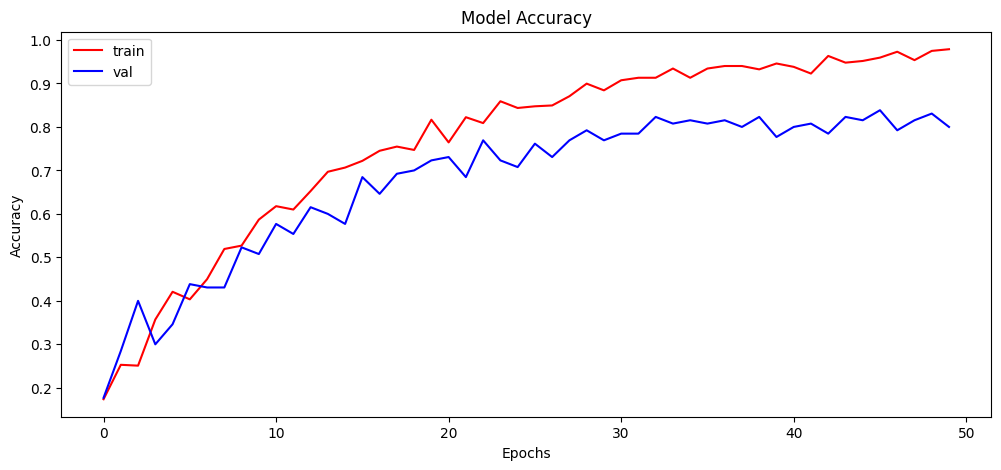

In [21]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Here we will plot the loss of the model for the training history.

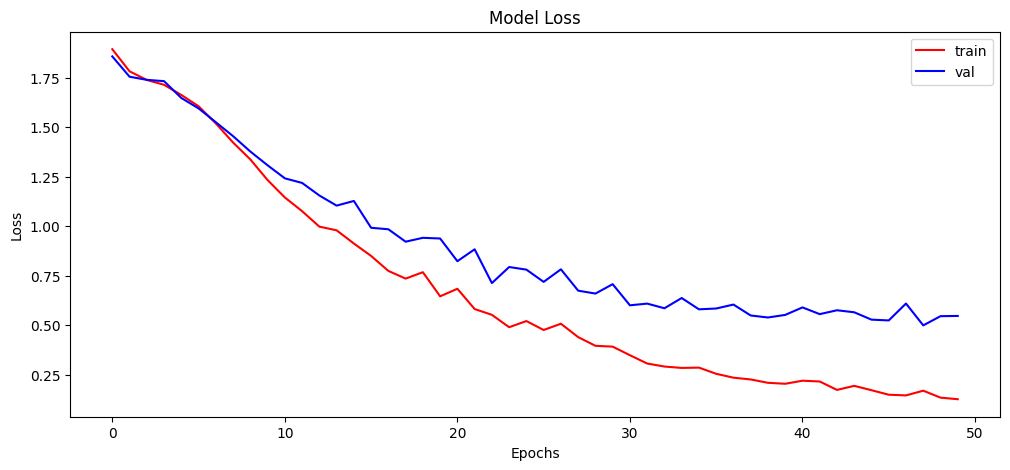

In [22]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Evaluating the model to know the accuracy of the model on the test data.

In [23]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8532 - loss: 0.3820
Test Accuracy: 82.82208442687988


Here we are storing prediction on test data.

In [24]:
# Storing predictions
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


Visualizing one of the image which we will be further used for prediction.

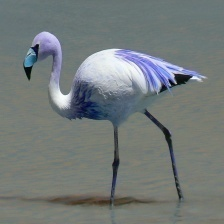

In [25]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

Now, we will create list of labels using object of label binarizer. We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax().

In [26]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  FLAMINGO
Predicted :  FLAMINGO


# Conclusion:

To develop a Convolutional Neural Network (CNN) for bird species classification, we followed a structured approach:

1. Dataset Preparation:

We began by uploading the bird species images to Google Drive and then mounted the drive in Google Colab to access the dataset directly. This method facilitates seamless integration between Google Drive and Colab, allowing for efficient data handling.


2. Data Visualization:

To understand the dataset's structure and content, we visualized a subset of images. This step helps in assessing the quality and diversity of the data, which is crucial for effective model training.

3. Data Normalization:

We normalized the image data to standardize the pixel values, ensuring they fall within a consistent range. Normalization is essential in CNNs as it accelerates convergence during training and improves model performance. Common normalization techniques include scaling pixel values to a [0, 1] range or standardizing them to have zero mean and unit variance.

4. Model Development:

We constructed a CNN model using Keras, incorporating layers such as convolutional layers for feature extraction, pooling layers for dimensionality reduction, and dense layers for classification. The model was compiled with the categorical crossentropy loss function, the Adam optimizer, and categorical accuracy as the evaluation metric.

5. Model Training:

The model was trained on the preprocessed dataset, with training and validation accuracy monitored at each epoch. This iterative process allows the model to learn and adjust its parameters to improve classification performance.

By following these steps, we developed a CNN capable of accurately predicting bird species from images, demonstrating the effectiveness of this approach in image classification tasks.

# Scope:

This project serves as an educational tool for understanding the design and implementation of Convolutional Neural Networks (CNNs). By exploring various network architectures and hyperparameters, learners can gain practical experience in building and optimizing CNN models. Additionally, the model's potential applications extend beyond education; bird sanctuaries can utilize it to accurately identify different bird species, aiding in conservation efforts and biodiversity monitoring.